In [ ]:
import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(13) # Better use a prime number for random seed

In [ ]:
def oracle(x, l=3): # l is the parameter for non linearity
  # Define an oracle that generates a non linear function
  #return x**2
  #return np.abs(np.abs(x-.4)-.2) + x/2 -.1
  return np.sinc(l*x)

In [ ]:
n = 30 # Number of samples
sigma = .01 # Noise
npl = 1000 # Number of samples for plot

In [ ]:
x = np.random.rand(n)
y = oracle(x) + sigma*np.random.randn(n)
xp = np.linspace(0,1,npl)
yp = oracle(xp)

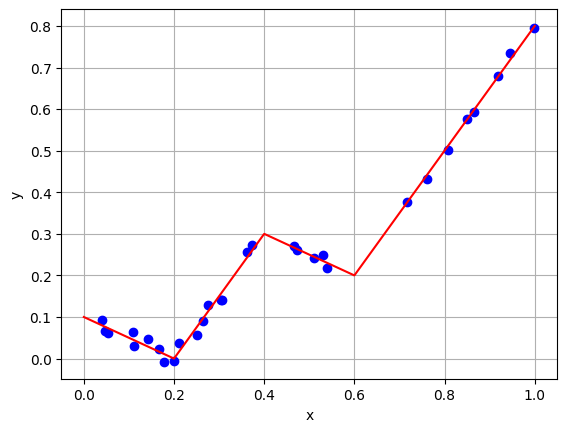

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xp, yp, 'r')
ax.set(xlabel = 'x', ylabel = 'y')
ax.grid()

In [ ]:
# Split the dataset in learning, validation and test
from sklearn.model_selection import train_test_split
xlv, xt, ylv, yt = train_test_split(x, y, test_size = .2) # Split data in learning-validation and test
xl, xv, yl, yv = train_test_split(xlv, ylv, test_size = .2) # Split learning-validation in learning and validation

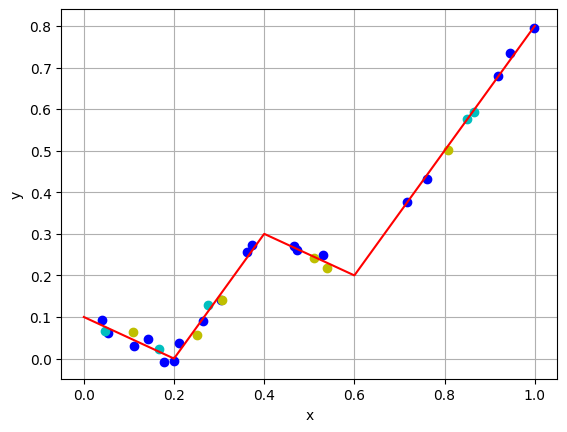

In [ ]:
fig, ax = plt.subplots()
ax.plot(xl,yl,'bo')
ax.plot(xv, yv, 'co')
ax.plot(xt, yt, 'yo')
ax.plot(xp, yp, 'r')
ax.set(xlabel = 'x', ylabel = 'y')
ax.grid()

Oss: By randomly dividing the data, it can happen that one of the set does not represent correctly our data

In [ ]:
# Train the ML model
def ml_model(xl, yl, xv, p, lam):
  xl = np.asmatrix(xl).transpose()
  yl = np.asmatrix(yl).transpose()
  xv = np.asmatrix(xv).transpose()

  nl = xl.shape[0]
  nv = xv.shape[0]
  Xl = nml.ones((nl,1))
  Xv = nml.ones((nv,1))

  for i in range(1,p+1):
    Xl = np.concatenate((Xl,np.power(xl,i)),axis=1)
    Xv = np.concatenate((Xv,np.power(xv,i)),axis=1)
  M = nml.zeros((p+1,p+1))
  for i in range(2,p+1):
    for j in range(2,p+1):
      M[i,j] = i*(i-1)*j*(j-1)/(i+j-3)

  c = np.linalg.solve(np.matmul(np.transpose(Xl),Xl)+lam*M,np.matmul(np.transpose(Xl),yl))
  yp = np.matmul(Xv,c)
  return yp

In [ ]:
# Tune the parameters by brute force
err_best = np.inf
for p in range(0,15): # From theory: this goes from 0 to infinite
  for lam in np.logspace(-6,4,33): # From theory: this goes from 0 to infinite, but I need to check also small values so use a log (to check both small and big values)
    yf = ml_model(xl, yl, xv, p, lam)
    err = np.mean(np.abs(yf-np.asmatrix(yv).transpose())) # Attention to have the same dimensions
    if (err_best > err): # Find the best parameters that reduce the error
      err_best = err
      p_best = p
      lam_best = lam
    #print(str(p) + " " + str(lam) + " " + str(err) + str(p_best) + " "+ str(lam_best) + " " + str(err_best))

In [ ]:
yf = ml_model(xlv, ylv, xp, p_best, lam_best)

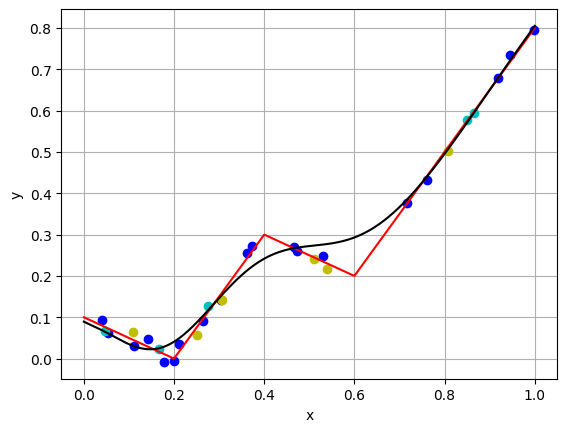

In [ ]:
fig, ax = plt.subplots()
ax.plot(xl,yl,'bo')
ax.plot(xv,yv,'co')
ax.plot(xt,yt,'yo')
ax.plot(xp,yp,'r')
ax.plot(xp,yf,'k')
ax.set(xlabel='x',ylabel='y')
ax.grid()

To improve more the results, is possible to split the dataset more times and randomly selects the points. After that is possible to improve the selection of the parameters by doing average.
